In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

Количество столбцов равно 15

Проверим это и удалим строки, где количество столбцов меньше

In [2]:
sum = 0
with open('test_task_ml/data.txt', 'r') as outfile, open('new_data.txt', 'w') as infile:
    for line in outfile:
        line_length = len(line.split(','))
        if  line_length < 15: 
            sum += 1
            continue
        elif line_length == 15:
            infile.write(line)
print('Удалено строк: ', sum)

Удалено строк:  3


In [3]:
column_names = [
    'age',
    'workclass',
    'final_weight',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'cap-gain',
    'cap-loss',
    'hours-per-week',
    'native-country',
    'comparison' # условие того, получает ли человек больше или меньше указанной суммы  
    
]

In [4]:
dtypes = {
    'age': 'int32',
    'workclass': 'category',
    'final_weight': 'float64',
    'education': 'category',
    'education-num': 'int32',
    'marital-status': 'category',
    'occupation': 'category',
    'relationship': 'category',
    'race': 'category',
    'sex': 'category',
    'cap-gain': 'float64',
    'cap-loss': 'float64',
    'hours-per-week': 'int32',
    'native-country': 'category',
    'comparison': 'category'
}

In [5]:
train_data = pd.read_csv('new_data.txt', names=column_names, dtype=dtypes)

In [6]:
train_data.head()

,age,workclass,final_weight,education,education-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hours-per-week,native-country,comparison
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40,United-States,<=N
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=N
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=N
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=N
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=N


In [7]:
train_data.dtypes

age                  int32
workclass         category
final_weight       float64
education         category
education-num        int32
marital-status    category
occupation        category
relationship      category
race              category
sex               category
cap-gain           float64
cap-loss           float64
hours-per-week       int32
native-country    category
comparison        category
dtype: object

In [8]:
for col in train_data.columns:
    print('Column name: ', col)
    print(train_data[col].unique())

Column name:  age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
  1 87]
Column name:  workclass
[State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked]
Categories (9, object): [State-gov, Self-emp-not-inc, Private, Federal-gov, ..., ?, Self-emp-inc, Without-pay, Never-worked]
Column name:  final_weight
[ 77516.  83311. 215646. ...  34066.  84661. 257302.]
Column name:  education
[Bachelors, HS-grad, 11th, Masters, 9th, ..., 5th-6th, 10th, 1st-4th, Preschool, 12th]
Length: 16
Categories (16, object): [Bachelors, HS-grad, 11th, Masters, ..., 10th, 1st-4th, Preschool, 12th]
Column name:  education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Column name:  marital-status
[Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-

In [9]:
train_data.shape

(32571, 15)

Так как данная задача сводится к бинарной классификации, то заменим в исходе категориальные признаки следующим образом:

меньше N -> 0

больше N -> 1

In [10]:
new_train_data = train_data.copy()
le = LabelEncoder()
new_train_data['comparison'] = le.fit_transform(new_train_data['comparison'])

In [11]:
new_train_data.head()

,age,workclass,final_weight,education,education-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hours-per-week,native-country,comparison
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,0
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,0
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,0
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,0


In [12]:
train_data.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
cap-gain          0
cap-loss          0
hours-per-week    0
native-country    0
comparison        0
dtype: int64

In [13]:
train_data.nunique()

age                  74
workclass             9
final_weight      21649
education            16
education-num        16
marital-status        7
occupation           15
relationship          7
race                  5
sex                   3
cap-gain            120
cap-loss             93
hours-per-week       95
native-country       42
comparison            2
dtype: int64

Как можно видеть в данном тренировочном наборе отсутствуют строки, где какой-либо признак имел значение NaN

Рассмотрим, как распределились записи в зависимости от класса >N или <=N

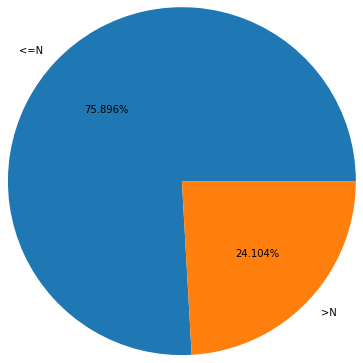

In [14]:
smaller, bigger = new_train_data['comparison'].value_counts()

plt.pie(x=[smaller, bigger], labels=['<=N', '>N'], autopct='%1.3f%%', radius=2)
plt.show()

Как можно видеть на круговой диаграмме тренировочный набор данных имеет сильное смещение в пользу класса <=N

Рассмотрим распределение значений в некоторых столбцах

In [15]:
from matplotlib.pyplot import figure

sns.set(rc={'figure.figsize':(20,15)})

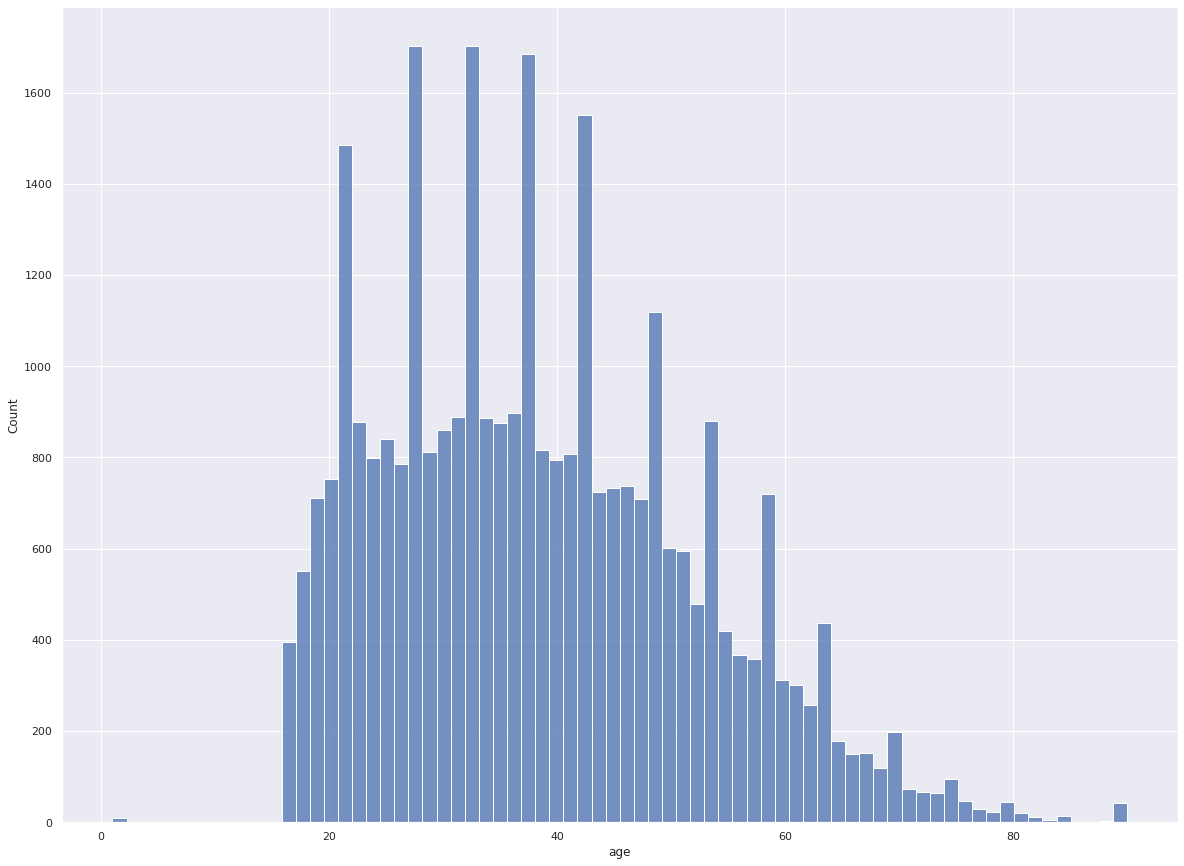

In [16]:
sns.histplot(data=new_train_data, x="age")

Можно видеть, что возраст некоторых опрошенных близко к 0.

Рассмотрим эти записи

In [17]:
new_train_data[new_train_data.age < 17]

,age,workclass,final_weight,education,education-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hours-per-week,native-country,comparison
26555,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1
26556,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1
26557,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1
26558,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1
26559,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1
26560,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1
26561,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1
26562,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1
26563,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1
26564,1,State-gov,-42141.0,Some-college,10,Never-married,Machine-op-inspct,Sales,Black,Other,100.0,-110.0,-1911779654,United-States,1


Данные имеют некоторые аномалии, например возраст равен 1 и количество часов работы в неделю меньше 0.

Такие данные очень странные и их можно удалить из набора

In [18]:
new_train_data = new_train_data.loc[new_train_data['age'] >= 17]

In [19]:
new_train_data.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int32)

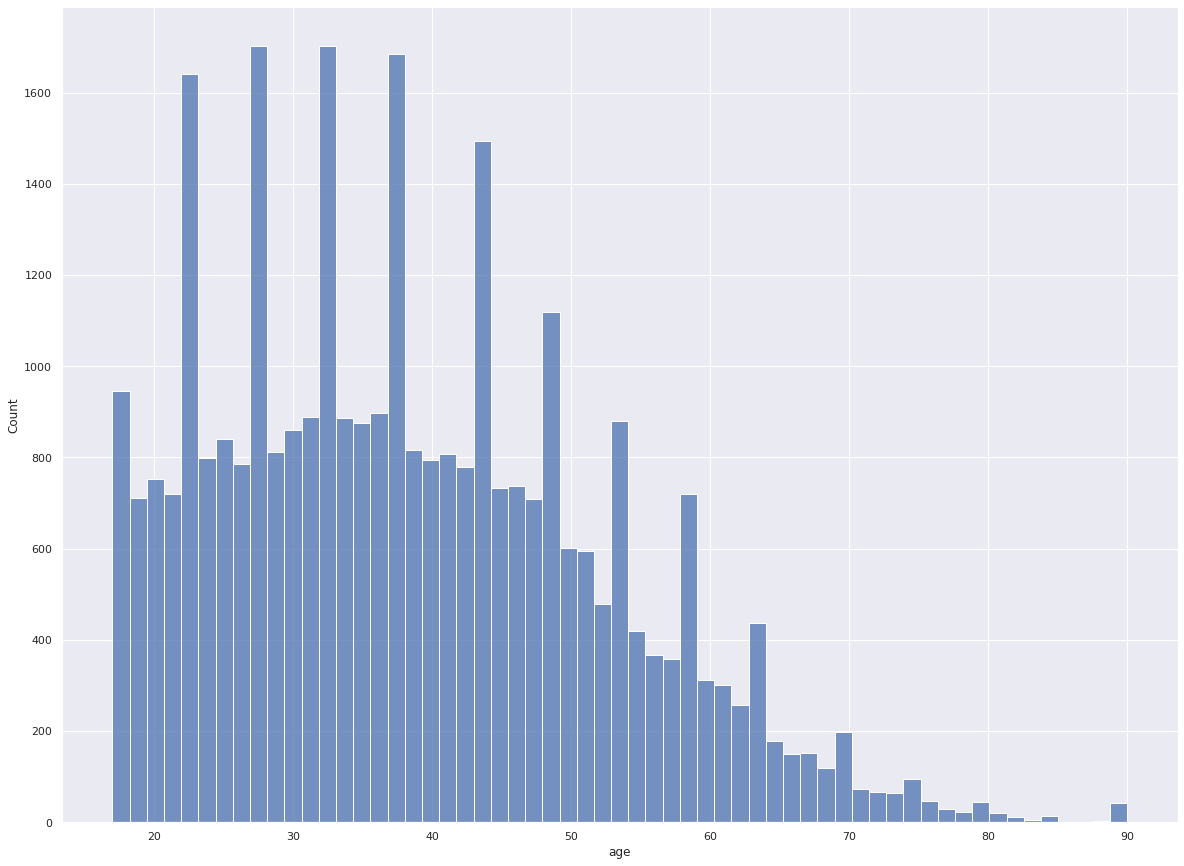

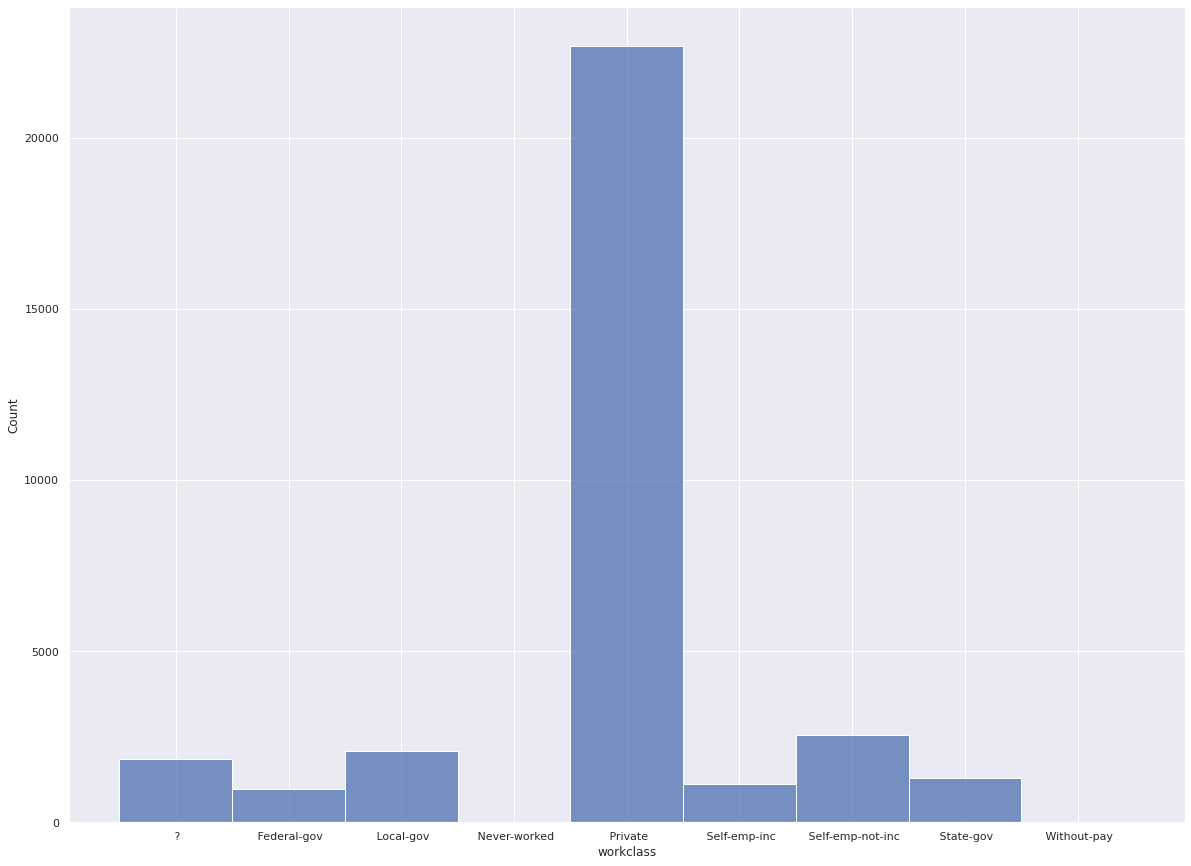

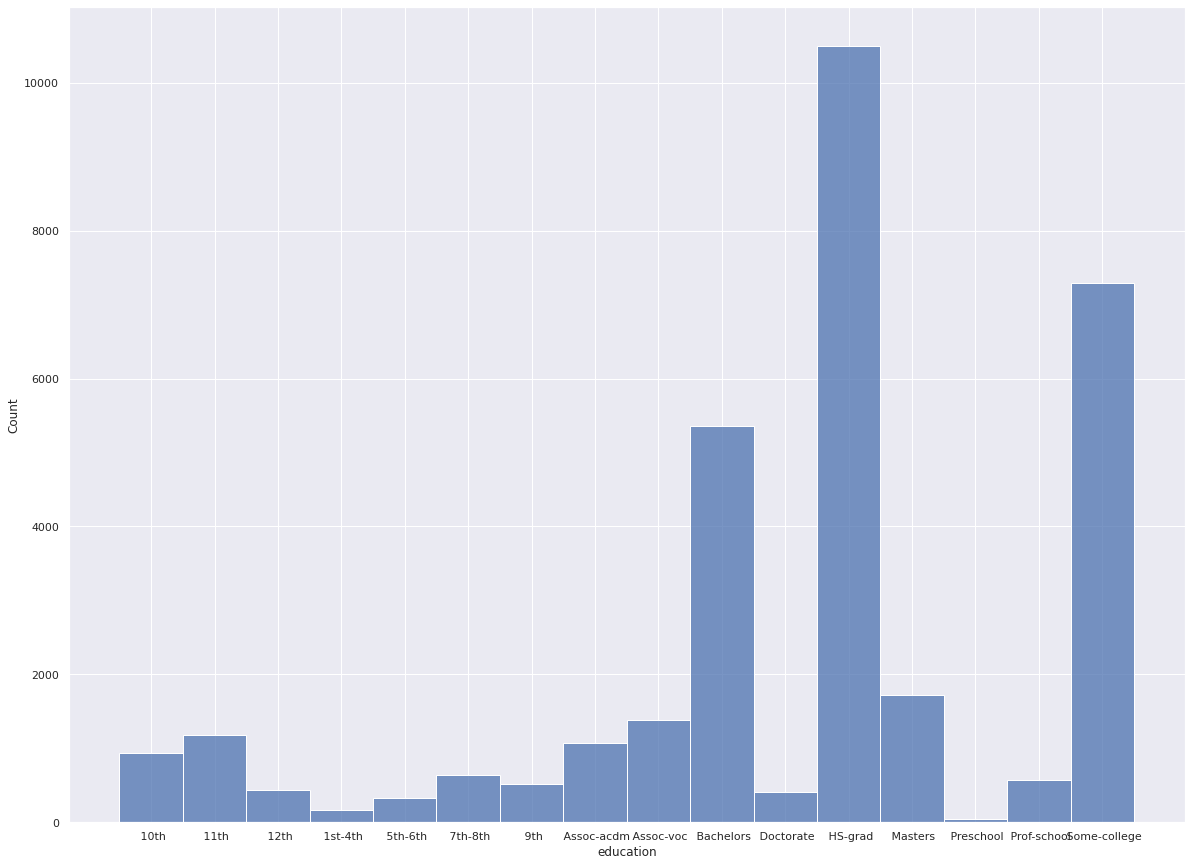

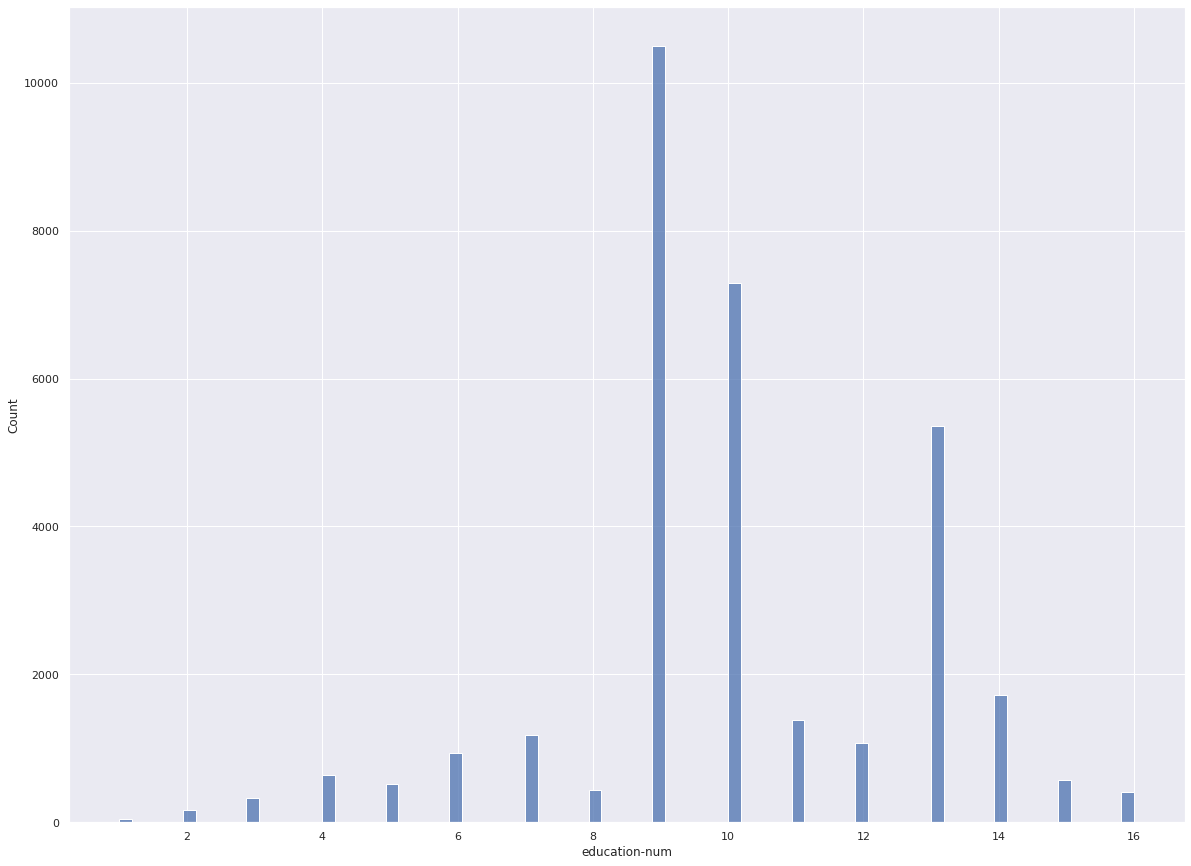

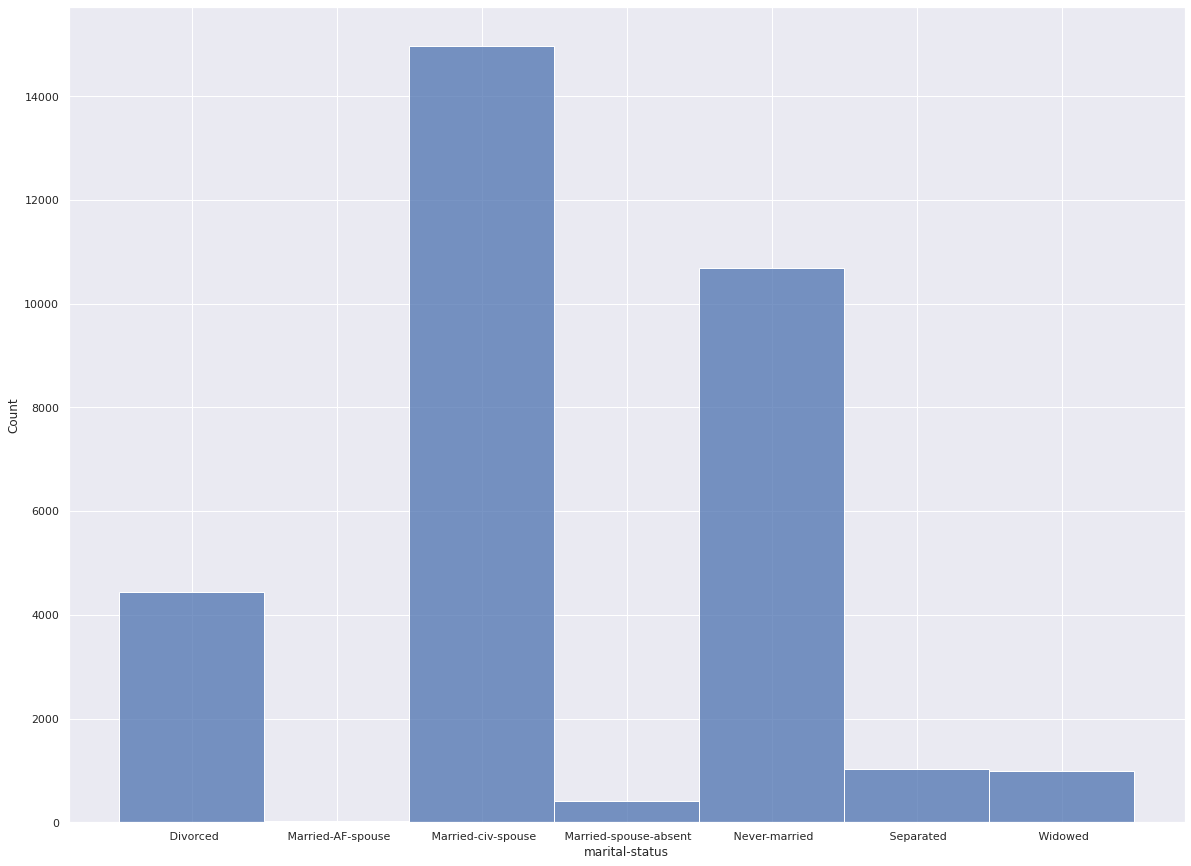

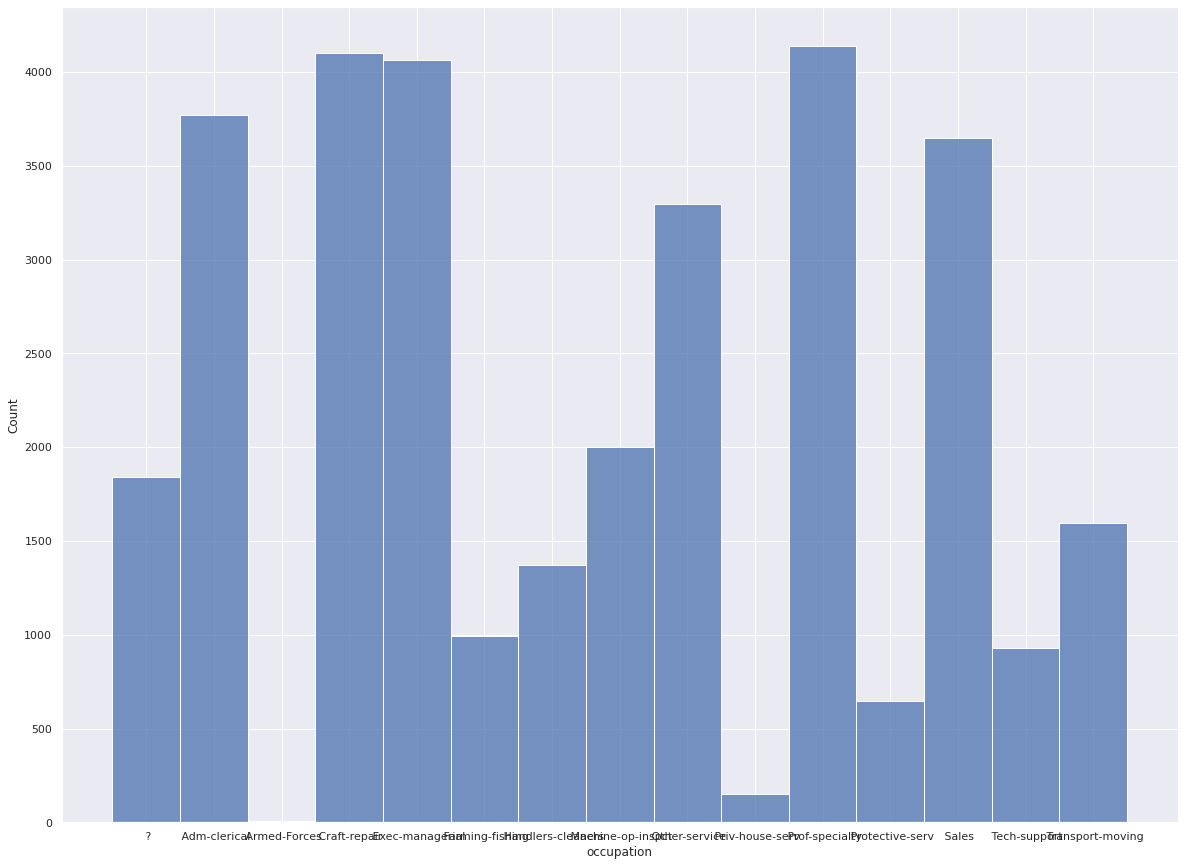

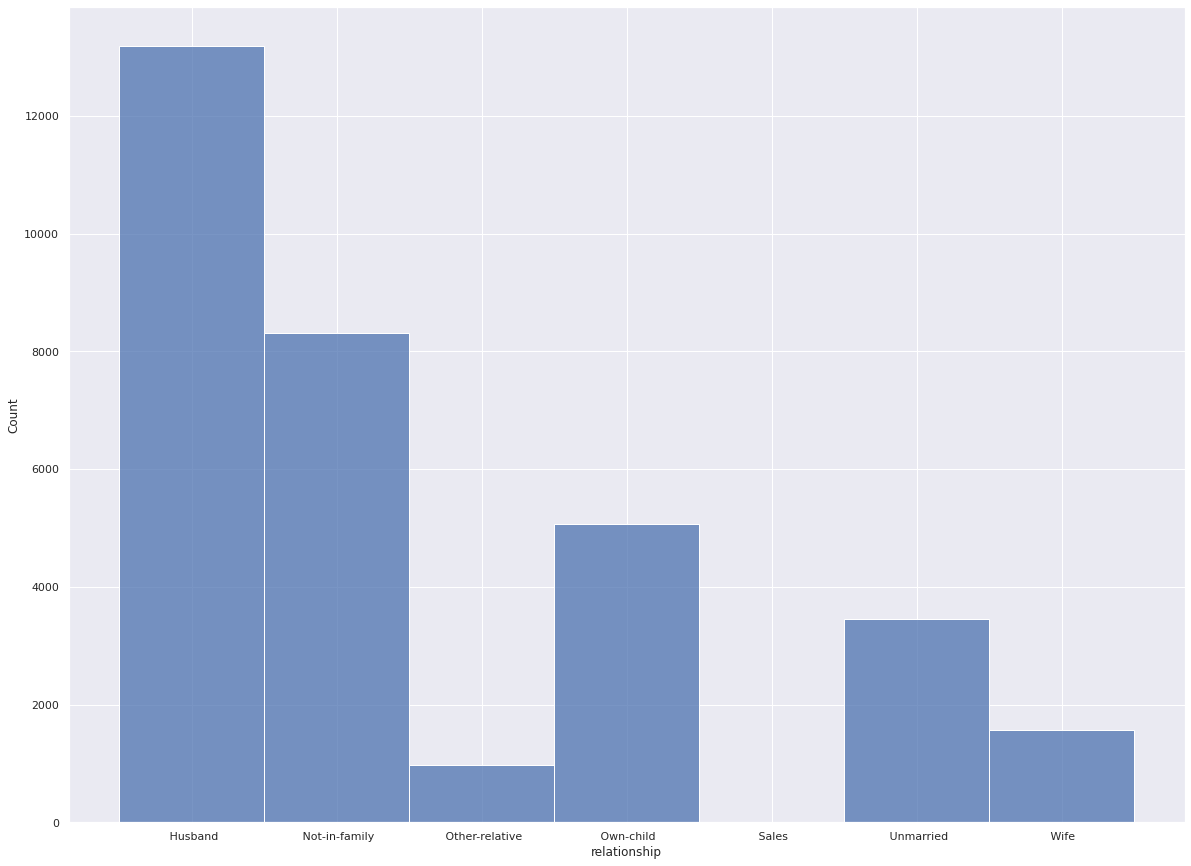

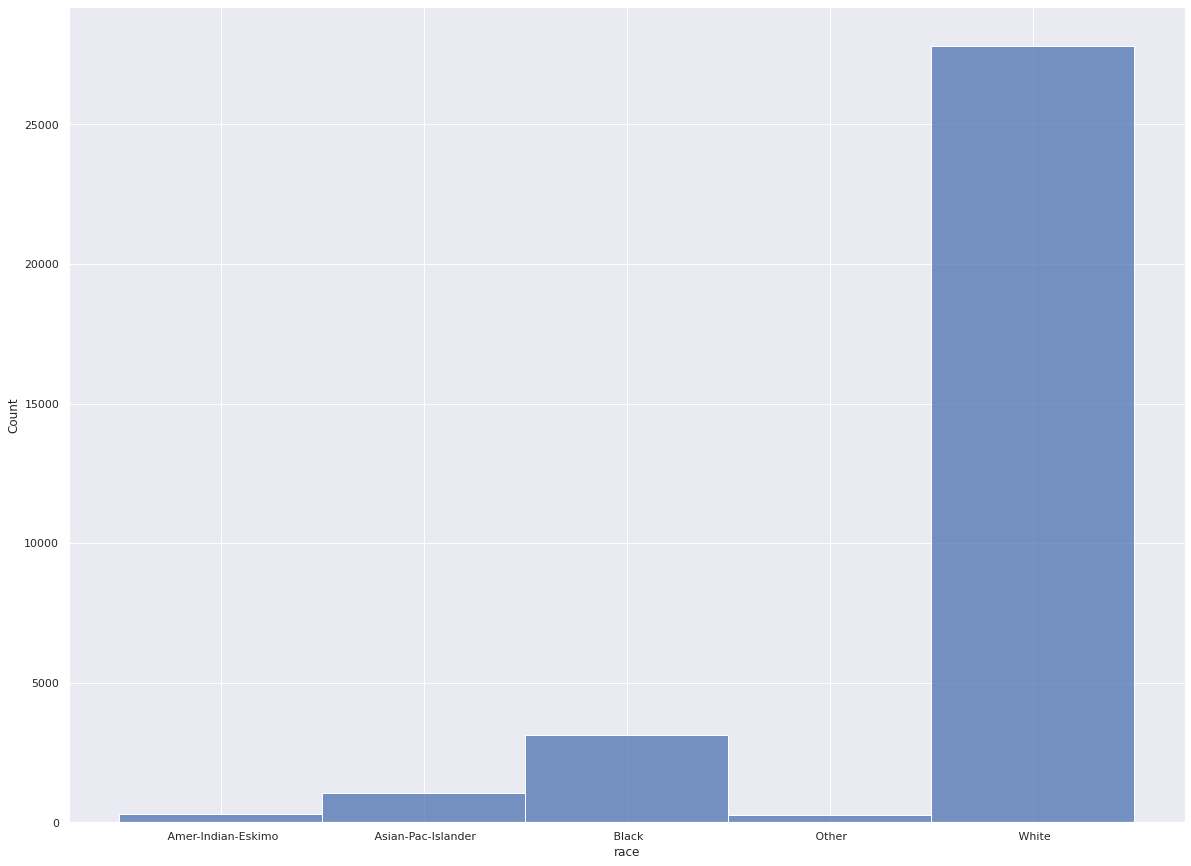

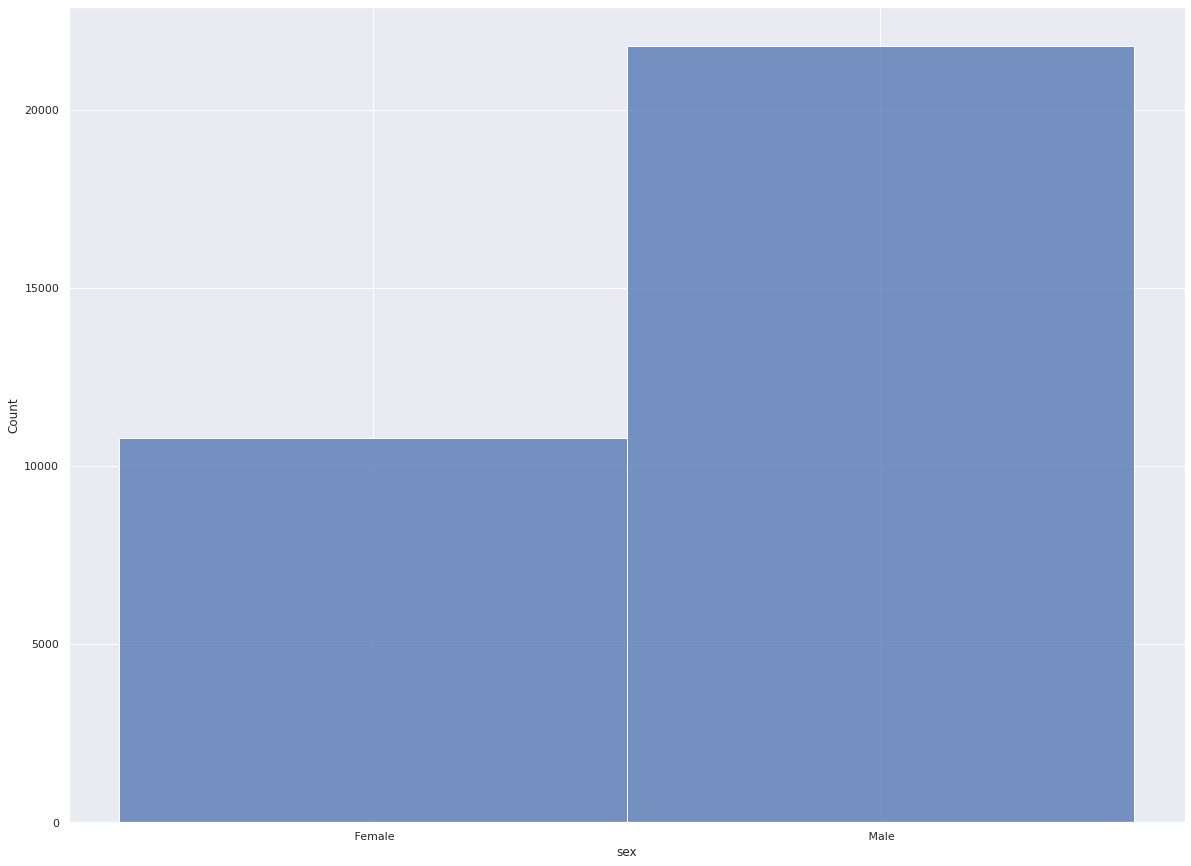

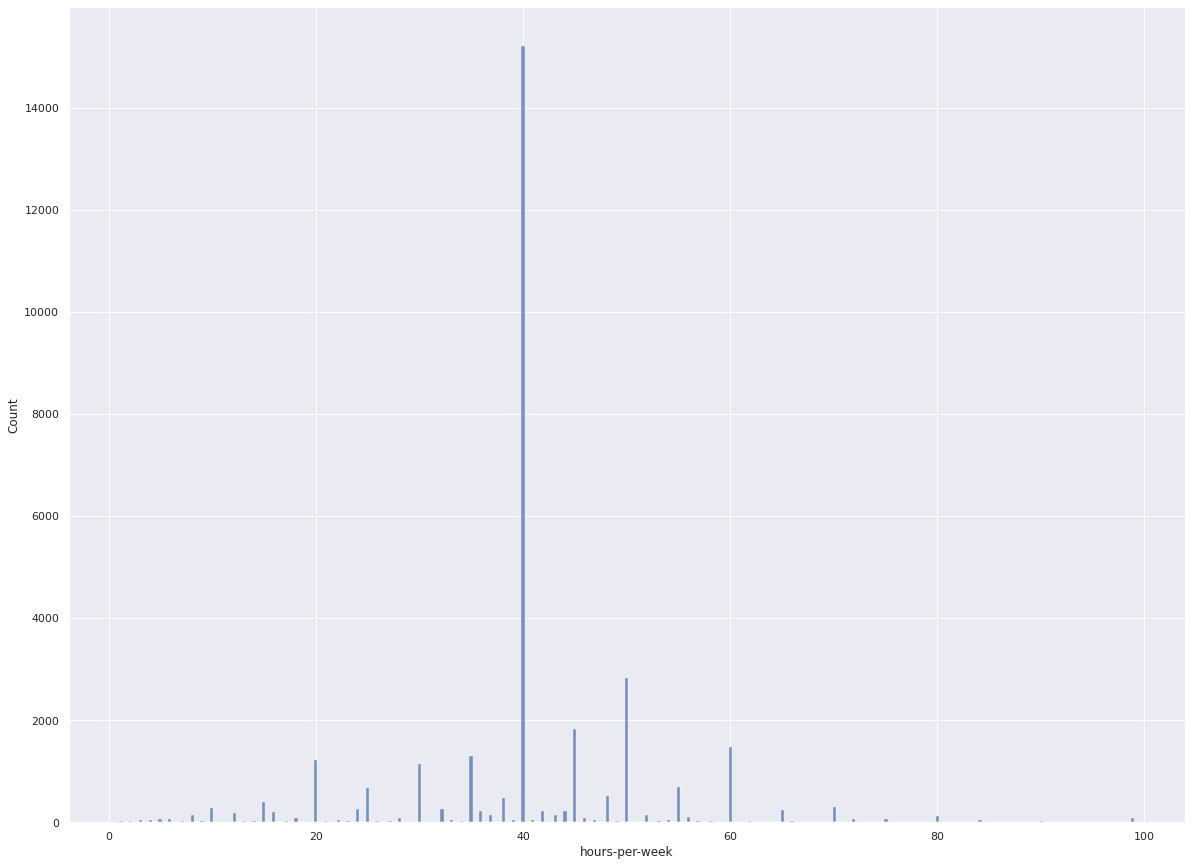

In [20]:
for i, col in enumerate(new_train_data.columns):
    if col not in ['final_weight', 'cap-gain', 'cap-loss', 'comparison', 'native-country']:
        plt.figure(i)
        sns.histplot(data=new_train_data, x=col)

Рассмотрим некоторые числовые признаки

In [21]:
new_train_data['cap-loss'].value_counts()

0.0       31042
1902.0      202
1977.0      168
1887.0      159
1485.0       51
          ...  
1539.0        1
155.0         1
2282.0        1
2472.0        1
2201.0        1
Name: cap-loss, Length: 92, dtype: int64

In [22]:
new_train_data['cap-gain'].value_counts()

0.0        29849
15024.0      347
7688.0       284
7298.0       246
99999.0      159
           ...  
7978.0         1
2538.0         1
1639.0         1
4931.0         1
1111.0         1
Name: cap-gain, Length: 119, dtype: int64

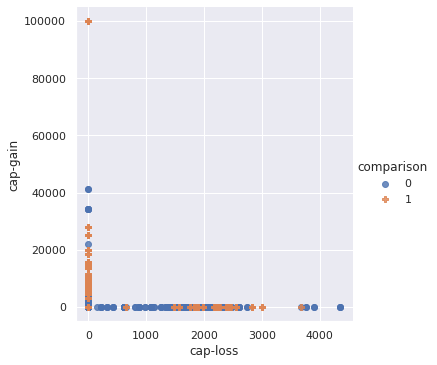

In [23]:
sns.lmplot(x='cap-loss', y='cap-gain', data=new_train_data, fit_reg=False, hue='comparison', markers=['o', 'P'])

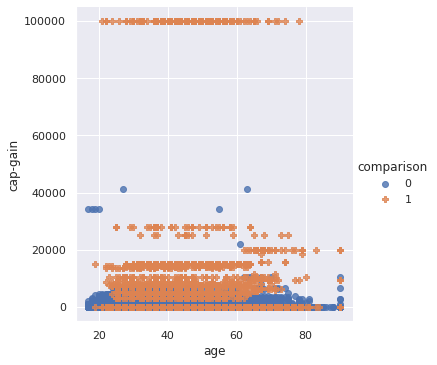

In [24]:
sns.lmplot(x='age', y='cap-gain', data=new_train_data, fit_reg=False, hue='comparison', markers=['o', 'P'])

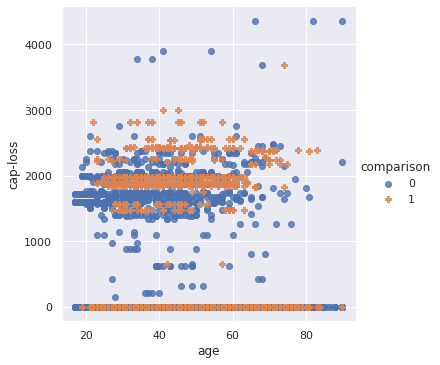

In [25]:
sns.lmplot(x='age', y='cap-loss', data=new_train_data, fit_reg=False, hue='comparison', markers=['o', 'P'])

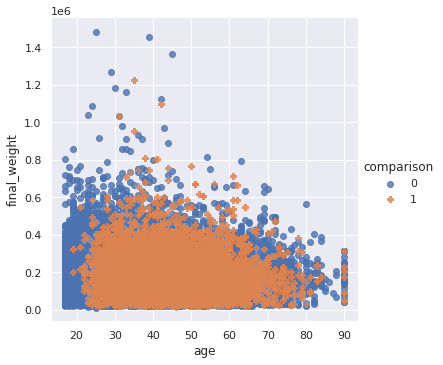

In [26]:
sns.lmplot(x='age', y='final_weight', data=new_train_data, fit_reg=False, hue='comparison', markers=['o', 'P'])

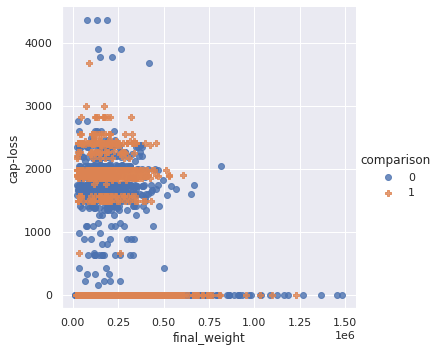

In [27]:
sns.lmplot(x='final_weight', y='cap-loss', data=new_train_data,
           fit_reg=False, hue='comparison', markers=['o', 'P'])

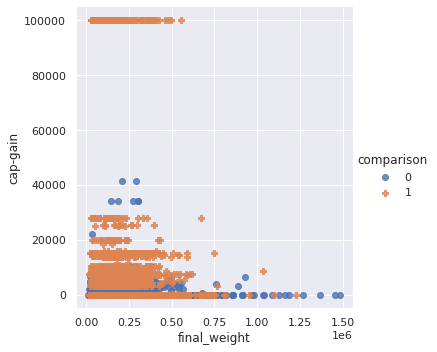

In [28]:
sns.lmplot(x='final_weight', y='cap-gain', data=new_train_data,
           fit_reg=False, hue='comparison', markers=['o', 'P'])

In [29]:
new_train_data.corr()

,age,final_weight,education-num,cap-gain,cap-loss,hours-per-week,comparison
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
final_weight,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
cap-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
cap-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
comparison,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


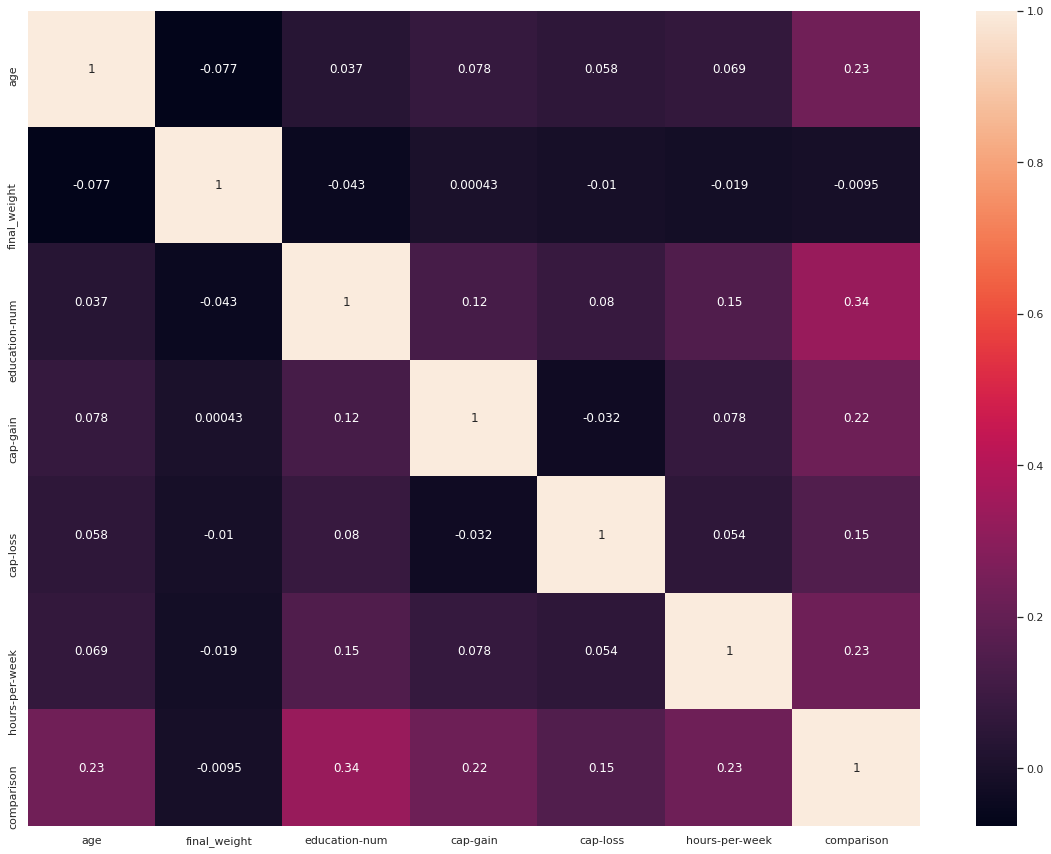

In [30]:
sns.heatmap(data=new_train_data.corr(), annot=True)

In [31]:
new_train_data['cap-diff'] = new_train_data['cap-gain'] - new_train_data['cap-loss']

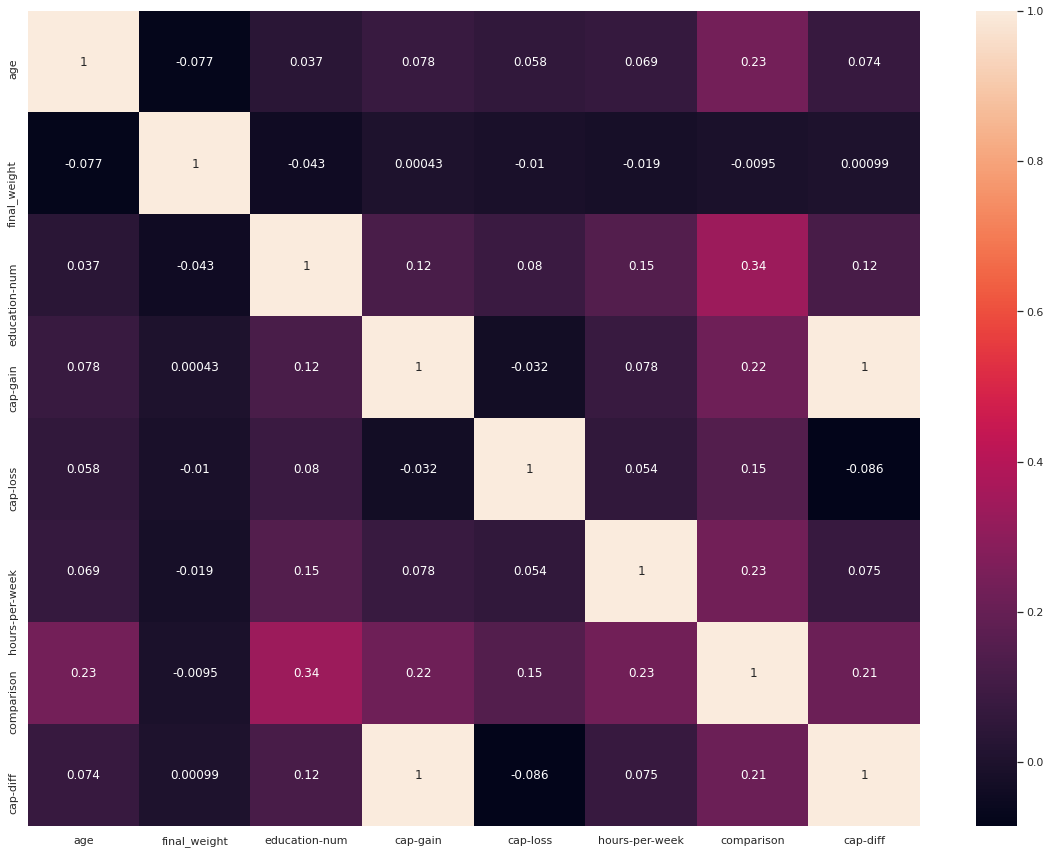

In [32]:
sns.heatmap(data=new_train_data.corr(), annot=True)

In [33]:
new_train_data['has_pos_cap'] = new_train_data['cap-diff'] >= 0
new_train_data['has_pos_cap'] = new_train_data['has_pos_cap'].apply(lambda x: int(x))

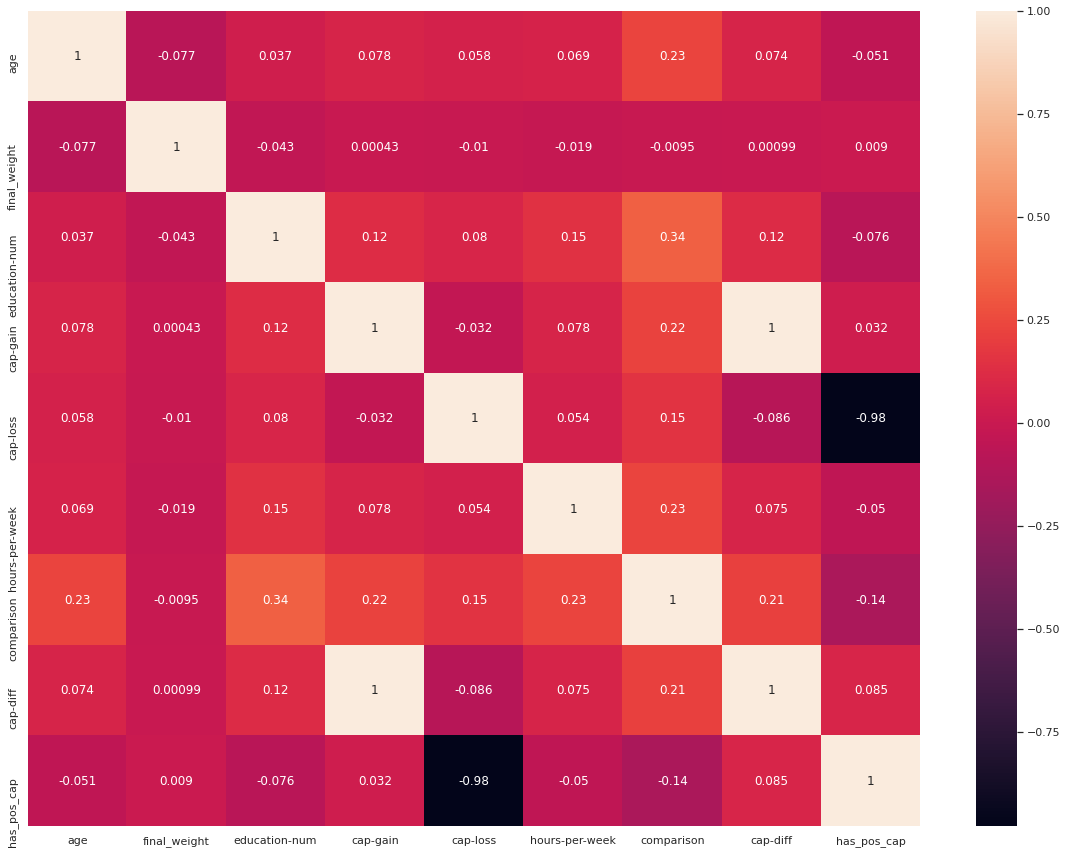

In [34]:
sns.heatmap(data=new_train_data.corr(), annot=True)

In [35]:
def encode_categorical_features(df):
    le = LabelEncoder()
    le.fit(new_train_data['workclass'])
    df['workclass'] = le.transform(df['workclass'])
    
    le.fit(new_train_data['education'])
    df['education'] = le.transform(df['education'])
    
    le.fit(new_train_data['marital-status'])
    df['marital-status'] = le.transform(df['marital-status'])
    
    le.fit(new_train_data['occupation'])
    df['occupation'] = le.transform(df['occupation'])
    
    le.fit(new_train_data['relationship'])
    df['relationship'] = le.transform(df['relationship'])
    
    le.fit(new_train_data['race'])
    df['race'] = le.transform(df['race'])
    
    le.fit(new_train_data['sex'])
    df['sex'] = le.transform(df['sex'])
    
    le.fit(new_train_data['native-country'])
    df['native-country'] = le.transform(df['native-country'])

In [36]:
encode_categorical_features(new_train_data)

In [37]:
new_train_data.head()

,age,workclass,final_weight,education,education-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hours-per-week,native-country,comparison,cap-diff,has_pos_cap
0,39,7,77516.0,9,13,4,1,1,4,1,2174.0,0.0,40,39,0,2174.0,1
1,50,6,83311.0,9,13,2,4,0,4,1,0.0,0.0,13,39,0,0.0,1
2,38,4,215646.0,11,9,0,6,1,4,1,0.0,0.0,40,39,0,0.0,1
3,53,4,234721.0,1,7,2,6,0,2,1,0.0,0.0,40,39,0,0.0,1
4,28,4,338409.0,9,13,2,10,5,2,0,0.0,0.0,40,5,0,0.0,1


In [38]:
def get_comparison_correlations(df):
    print(df.corr()['comparison'].sort_values(ascending=False))
get_comparison_correlations(new_train_data)
new_train_data = new_train_data.drop(columns=['final_weight'], axis=1)

comparison        1.000000
education-num     0.335154
age               0.234037
hours-per-week    0.229689
cap-gain          0.223329
sex               0.215980
cap-diff          0.214428
cap-loss          0.150526
education         0.079317
occupation        0.075468
race              0.071846
workclass         0.051604
native-country    0.015840
final_weight     -0.009463
has_pos_cap      -0.138692
marital-status   -0.199307
relationship     -0.250918
Name: comparison, dtype: float64


Валидация модели

In [39]:
y = new_train_data.comparison
X = new_train_data.drop(axis=1, columns=['comparison'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [41]:
def plot_roc_curve(y_test, y_pred, label=None):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.figure(figsize=[20, 20])
    plt.show()
    auc_score = roc_auc_score(y_test, y_pred)
    print(auc_score)

In [42]:
tree_parameters = {'criterion' : ['gini', 'entropy'], 
                   'max_depth': range(0, 20),
                  'min_samples_split': range(2, 10)}
decision_tree = DecisionTreeClassifier()
gcv_tree = RandomizedSearchCV(decision_tree, tree_parameters, random_state=42)
gcv_tree.fit(X_train, y_train)

/home/dmitry/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dmitry/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dmitry/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/dmitry/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/home/dmitry/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set 

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(0, 20),
                                        'min_samples_split': range(2, 10)},
                   random_state=42)

In [43]:
decision_tree = gcv_tree.best_estimator_
gcv_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8)

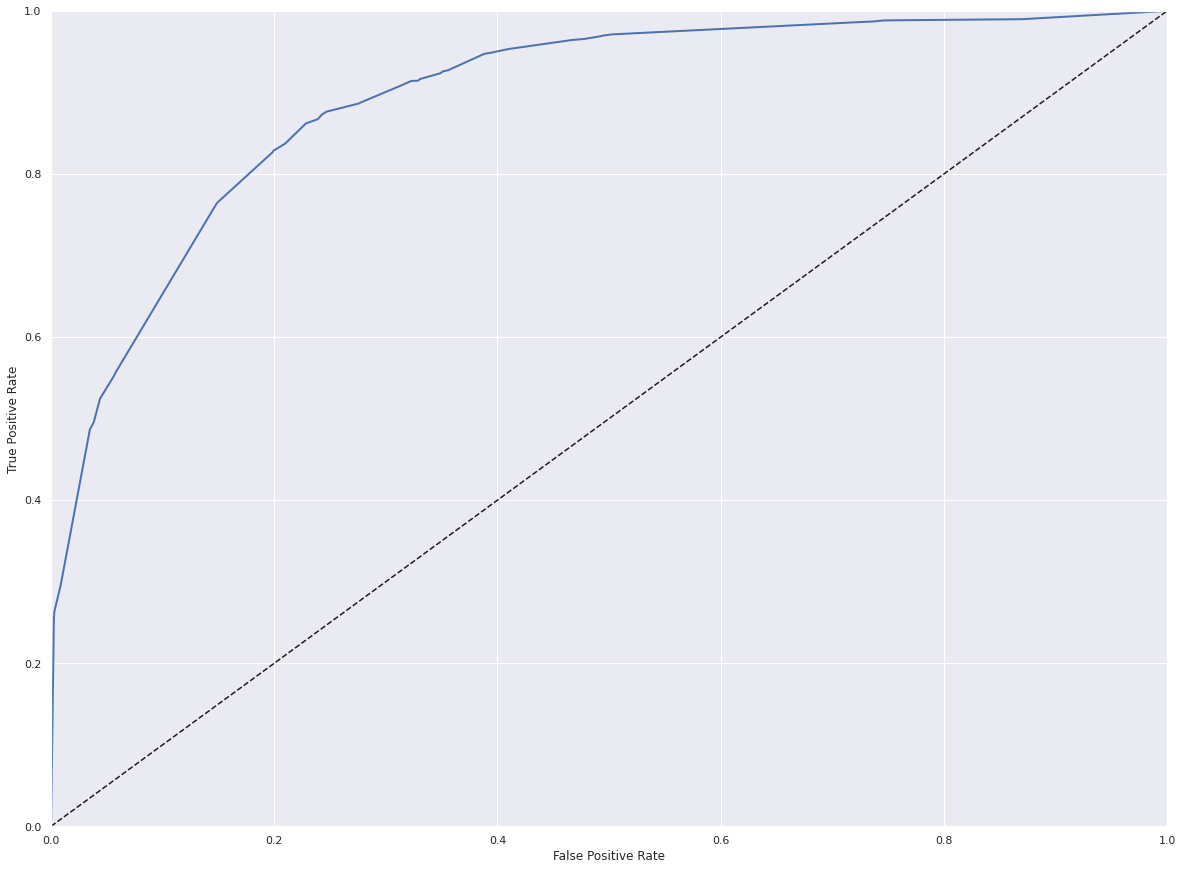

<Figure size 1440x1440 with 0 Axes>

0.8939980679336788


In [44]:
plot_roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])

In [45]:
forest_parameters = {'n_estimators': range(1, 100),
                    'criterion': ['gini', 'entropy'],
                    'max_depth': range(0, 20),
                    'min_samples_split': range(2, 10)}
random_forest = RandomForestClassifier()
gcv_forest = RandomizedSearchCV(random_forest, forest_parameters, random_state=42)
gcv_forest.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(0, 20),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(1, 100)},
                   random_state=42)

In [46]:
random_forest = gcv_forest.best_estimator_
gcv_forest.best_estimator_

RandomForestClassifier(max_depth=14, min_samples_split=3, n_estimators=98)

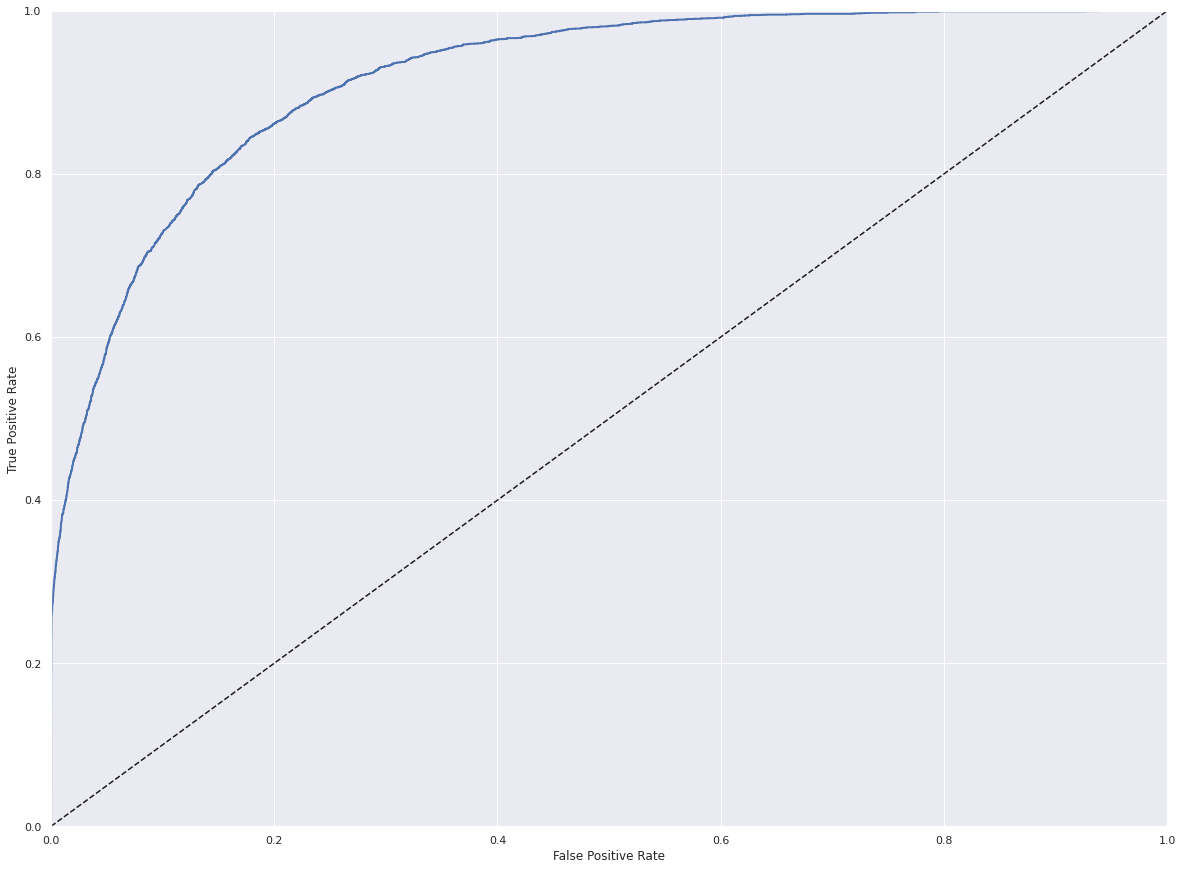

<Figure size 1440x1440 with 0 Axes>

0.9171287370637127


In [47]:
plot_roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])

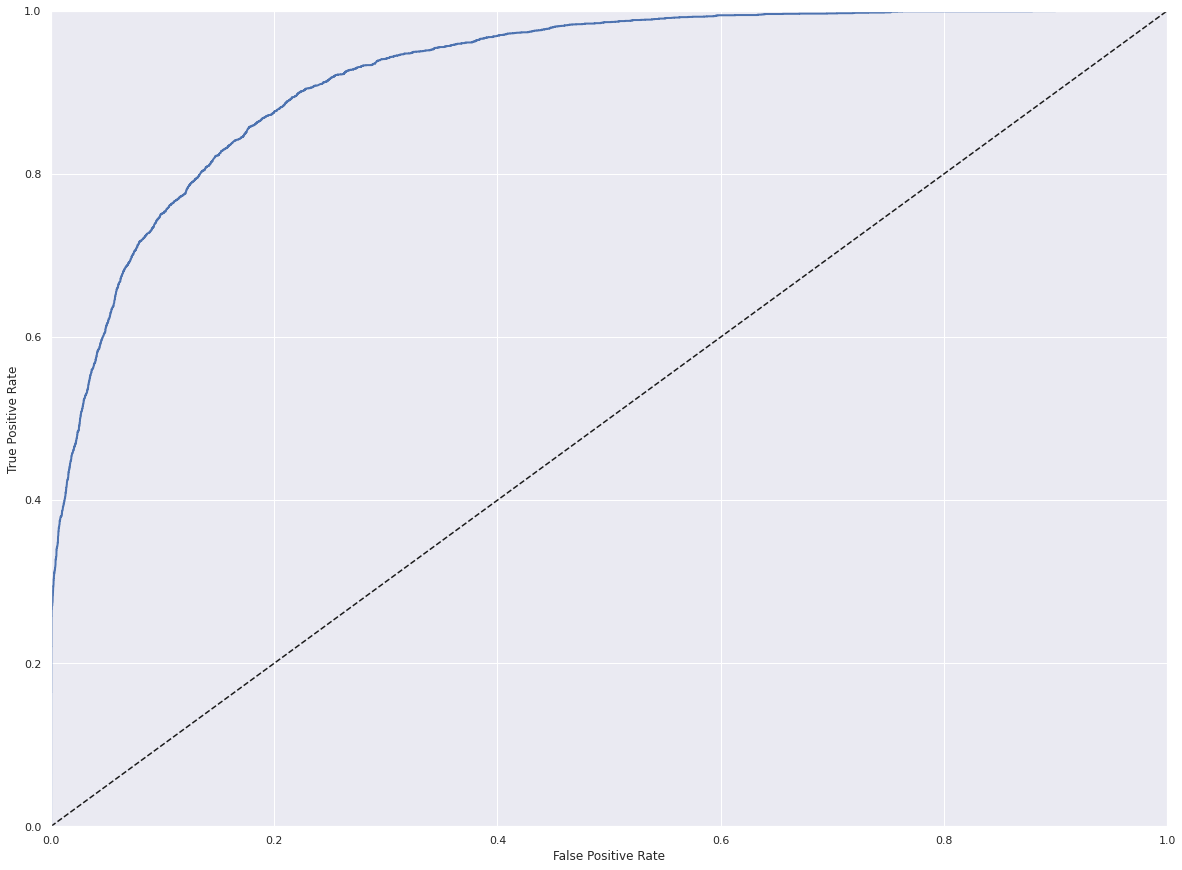

<Figure size 1440x1440 with 0 Axes>

0.9240865161565696


In [48]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
plot_roc_curve(y_test, lgb_model.predict_proba(X_test)[:, 1])